In [1]:
import pandas as pd 

# Admission on UHR

In [2]:
import requests
import json

In [3]:
# Fetch the data from provided url
def fetch_data(url): 
    response = requests.get(url)
    print(response.status_code) # status code 200 is ok
    return response.json()

In [4]:
antagning_data = fetch_data('https://www.uhr.se/api/antagningsstatistik/searchTotal?searchfor=data&searchterm=HT23&searchkategori=&pagesize=1000&page=1&tillfalle=urv2')
antagning_data.keys()

200


dict_keys(['antalObjekt', 'data'])

In [6]:
# the data is what will be analysed and is therefore extracted from the embedded json-structure
antagning_df = pd.DataFrame.from_records(antagning_data['data'])
antagning_df.head(10)

,senasteUrval,uppkomsttillfälleHeader,tillfälleId,tillfälle,terminId,termin,år,antagningsomgångId,antagningsomgångKategori,lärosäteId,...,startperiod,undervisningsform,studietid,studieort,examen,ämnesgrupp,nyckelord,sok,urval1,urval2
0,Urval2,Sok,None,None,HT23,Höst,None,HT2023,Hösttermin,BTH,...,2023P4,NML,DAG,Karlskrona,Civilingenjörsexamen,None,"IT-säkerhet,Säkerhet,Programmering,Information...","{'sökande': 194, 'förstahandsökande': 22, 'kvi...","{'urvalsgrupper': [{'urvalsgruppId': 'BI', 'lä...","{'urvalsgrupper': [{'urvalsgruppId': 'BI', 'lä..."
1,Urval2,Sok,None,None,HT23,Höst,None,HT2023,Hösttermin,BTH,...,2023P4,NML,DAG,Karlskrona,Högskoleingenjörsexamen (över/lika med 180 hp),None,"Datasäkerhet,Informationssäkerhet,Programmerin...","{'sökande': 219, 'förstahandsökande': 33, 'kvi...","{'urvalsgrupper': [{'urvalsgruppId': 'BF', 'lä...","{'urvalsgrupper': [{'urvalsgruppId': 'BF', 'lä..."
2,Urval1,Sok,None,None,HT23,Höst,None,MASTERHT23,Internationella masterprogram hösttermin,BTH,...,2023P4,NML,DAG,Karlskrona,None,None,"data,datastruktur,säkerhet,algoritm,ai,artific...","{'sökande': 674, 'förstahandsökande': 240, 'kv...","{'urvalsgrupper': [{'urvalsgruppId': 'DA', 'lä...",None
3,Urval2,Sok,None,None,HT23,Höst,None,HT2023,Hösttermin,BTH,...,2023P4,NML,DAG,Karlskrona,None,Datateknik,None,"{'sökande': 5, 'förstahandsökande': 2, 'kvinnl...","{'urvalsgrupper': [{'urvalsgruppId': 'HPGR', '...","{'urvalsgrupper': [{'urvalsgruppId': 'HPGR', '..."
4,Urval1,Sok,None,None,HT23,Höst,None,VIFYHT23,"Vidareutbildning för yrkesverksamma, hösttermin",BTH,...,2023P4,DST,BLA,Ortsoberoende,None,Datateknik,None,"{'sökande': 26, 'förstahandsökande': 15, 'kvin...","{'urvalsgrupper': [{'urvalsgruppId': 'HPAV', '...",None
5,Urval1,Sok,None,None,HT23,Höst,None,VIFYHT23,"Vidareutbildning för yrkesverksamma, hösttermin",BTH,...,2023P4,DST,BLA,Ortsoberoende,None,Datateknik,None,"{'sökande': 21, 'förstahandsökande': 9, 'kvinn...","{'urvalsgrupper': [{'urvalsgruppId': 'HPAV', '...",None
6,Urval2,Sok,None,None,HT23,Höst,None,HT2023,Hösttermin,BTH,...,2023P4,DST,DAG,Ortsoberoende,None,Datateknik,None,"{'sökande': 53, 'förstahandsökande': 9, 'kvinn...","{'urvalsgrupper': [{'urvalsgruppId': 'HPAV', '...","{'urvalsgrupper': [{'urvalsgruppId': 'HPAV', '..."
7,Urval1,Sok,None,None,HT23,Höst,None,VIFYHT23,"Vidareutbildning för yrkesverksamma, hösttermin",BTH,...,2023P4,DST,BLA,Ortsoberoende,None,Datateknik,None,"{'sökande': 22, 'förstahandsökande': 5, 'kvinn...","{'urvalsgrupper': [{'urvalsgruppId': 'HPAV', '...",None
8,Urval1,Sok,None,None,HT23,Höst,None,VIFYHT23,"Vidareutbildning för yrkesverksamma, hösttermin",BTH,...,2023P5,DST,BLA,Ortsoberoende,None,Datateknik,None,"{'sökande': 33, 'förstahandsökande': 13, 'kvin...","{'urvalsgrupper': [{'urvalsgruppId': 'HPAV', '...",None
9,Urval1,Sok,None,None,HT23,Höst,None,VIFYHT23,"Vidareutbildning för yrkesverksamma, hösttermin",BTH,...,2023P5,DST,BLA,Ortsoberoende,None,Datateknik,None,"{'sökande': 29, 'förstahandsökande': 15, 'kvin...","{'urvalsgrupper': [{'urvalsgruppId': 'HPAV', '...",None


In [7]:
antagning_df.info() # some attributes seem to miss values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   senasteUrval                  1000 non-null   object
 1   uppkomsttillfälleHeader       1000 non-null   object
 2   tillfälleId                   0 non-null      object
 3   tillfälle                     0 non-null      object
 4   terminId                      1000 non-null   object
 5   termin                        1000 non-null   object
 6   år                            0 non-null      object
 7   antagningsomgångId            1000 non-null   object
 8   antagningsomgångKategori      1000 non-null   object
 9   lärosäteId                    1000 non-null   object
 10  lärosäte                      1000 non-null   object
 11  anmälningsalternativId        1000 non-null   object
 12  anmälningskod                 1000 non-null   object
 13  anmälningsalternati

In [8]:
# Display all columns
antagning_df.columns

Index(['senasteUrval', 'uppkomsttillfälleHeader', 'tillfälleId', 'tillfälle',
       'terminId', 'termin', 'år', 'antagningsomgångId',
       'antagningsomgångKategori', 'lärosäteId', 'lärosäte',
       'anmälningsalternativId', 'anmälningskod', 'anmälningsalternativ',
       'anmälningsalternativEngelska', 'utbildningstyp', 'utbildningId',
       'utbildningsnyckel', 'inställd', 'kursId', 'programId',
       'programinriktning', 'studietakt', 'startperiod', 'undervisningsform',
       'studietid', 'studieort', 'examen', 'ämnesgrupp', 'nyckelord', 'sok',
       'urval1', 'urval2'],
      dtype='object')

## Select appropriate attributes for analysis

In [9]:
antagning_df[['senasteUrval', 'uppkomsttillfälleHeader', 'tillfälleId', 'tillfälle',
       'terminId', 'termin', 'år', 'antagningsomgångId',
       'antagningsomgångKategori', 'lärosäte',
       'anmälningsalternativId', 'anmälningskod', 'anmälningsalternativ',
       'anmälningsalternativEngelska', 'utbildningstyp', 'utbildningId',
       'utbildningsnyckel', 'inställd', 'kursId', 'programId',
       'programinriktning', 'studietakt', 'startperiod', 'undervisningsform',
       'examen', 'ämnesgrupp', 'nyckelord', 'sok',
       'urval1', 'urval2']].head(10)

# General values that appear does not define the education are not included or appear twice, 
# e.g. 'senasteUrval', 'uppkomsttillfälleHeader', 'tillfälleId', 'tillfälle', 
# 'terminId', 'termin', 'år', 'antagningsomgångId',
# 'antagningsomgångKategori', 'lärosäteId', 
# 'anmälningsalternativId', 'anmälningskod', 'anmälningsalternativEngelska', 'utbildningstyp', 'utbildningId',
# 'utbildningsnyckel', 'inställd', 'kursId', 'programId',
# 'programinriktning', 'studietakt', 'startperiod', 'undervisningsform',
# 'examen', 'ämnesgrupp', 'nyckelord', 
# 'urval1', 'urval2'

,senasteUrval,uppkomsttillfälleHeader,tillfälleId,tillfälle,terminId,termin,år,antagningsomgångId,antagningsomgångKategori,lärosäte,...,programinriktning,studietakt,startperiod,undervisningsform,examen,ämnesgrupp,nyckelord,sok,urval1,urval2
0,Urval2,Sok,None,None,HT23,Höst,None,HT2023,Hösttermin,Blekinge tekniska högskola,...,None,100,2023P4,NML,Civilingenjörsexamen,None,"IT-säkerhet,Säkerhet,Programmering,Information...","{'sökande': 194, 'förstahandsökande': 22, 'kvi...","{'urvalsgrupper': [{'urvalsgruppId': 'BI', 'lä...","{'urvalsgrupper': [{'urvalsgruppId': 'BI', 'lä..."
1,Urval2,Sok,None,None,HT23,Höst,None,HT2023,Hösttermin,Blekinge tekniska högskola,...,None,100,2023P4,NML,Högskoleingenjörsexamen (över/lika med 180 hp),None,"Datasäkerhet,Informationssäkerhet,Programmerin...","{'sökande': 219, 'förstahandsökande': 33, 'kvi...","{'urvalsgrupper': [{'urvalsgruppId': 'BF', 'lä...","{'urvalsgrupper': [{'urvalsgruppId': 'BF', 'lä..."
2,Urval1,Sok,None,None,HT23,Höst,None,MASTERHT23,Internationella masterprogram hösttermin,Blekinge tekniska högskola,...,None,100,2023P4,NML,None,None,"data,datastruktur,säkerhet,algoritm,ai,artific...","{'sökande': 674, 'förstahandsökande': 240, 'kv...","{'urvalsgrupper': [{'urvalsgruppId': 'DA', 'lä...",None
3,Urval2,Sok,None,None,HT23,Höst,None,HT2023,Hösttermin,Blekinge tekniska högskola,...,None,50,2023P4,NML,None,Datateknik,None,"{'sökande': 5, 'förstahandsökande': 2, 'kvinnl...","{'urvalsgrupper': [{'urvalsgruppId': 'HPGR', '...","{'urvalsgrupper': [{'urvalsgruppId': 'HPGR', '..."
4,Urval1,Sok,None,None,HT23,Höst,None,VIFYHT23,"Vidareutbildning för yrkesverksamma, hösttermin",Blekinge tekniska högskola,...,None,17,2023P4,DST,None,Datateknik,None,"{'sökande': 26, 'förstahandsökande': 15, 'kvin...","{'urvalsgrupper': [{'urvalsgruppId': 'HPAV', '...",None
5,Urval1,Sok,None,None,HT23,Höst,None,VIFYHT23,"Vidareutbildning för yrkesverksamma, hösttermin",Blekinge tekniska högskola,...,None,25,2023P4,DST,None,Datateknik,None,"{'sökande': 21, 'förstahandsökande': 9, 'kvinn...","{'urvalsgrupper': [{'urvalsgruppId': 'HPAV', '...",None
6,Urval2,Sok,None,None,HT23,Höst,None,HT2023,Hösttermin,Blekinge tekniska högskola,...,None,12,2023P4,DST,None,Datateknik,None,"{'sökande': 53, 'förstahandsökande': 9, 'kvinn...","{'urvalsgrupper': [{'urvalsgruppId': 'HPAV', '...","{'urvalsgrupper': [{'urvalsgruppId': 'HPAV', '..."
7,Urval1,Sok,None,None,HT23,Höst,None,VIFYHT23,"Vidareutbildning för yrkesverksamma, hösttermin",Blekinge tekniska högskola,...,None,25,2023P4,DST,None,Datateknik,None,"{'sökande': 22, 'förstahandsökande': 5, 'kvinn...","{'urvalsgrupper': [{'urvalsgruppId': 'HPAV', '...",None
8,Urval1,Sok,None,None,HT23,Höst,None,VIFYHT23,"Vidareutbildning för yrkesverksamma, hösttermin",Blekinge tekniska högskola,...,None,50,2023P5,DST,None,Datateknik,None,"{'sökande': 33, 'förstahandsökande': 13, 'kvin...","{'urvalsgrupper': [{'urvalsgruppId': 'HPAV', '...",None
9,Urval1,Sok,None,None,HT23,Höst,None,VIFYHT23,"Vidareutbildning för yrkesverksamma, hösttermin",Blekinge tekniska högskola,...,None,50,2023P5,DST,None,Datateknik,None,"{'sökande': 29, 'förstahandsökande': 15, 'kvin...","{'urvalsgrupper': [{'urvalsgruppId': 'HPAV', '...",None


In [10]:
antagning_df[['nyckelord']].isnull().value_counts()
# Since almost half of the educations are missing keywords, the column will not be used even though it would provide insight

nyckelord
False        535
True         465
dtype: int64

### Selected attributes

In [13]:
antagning_df = antagning_df[['studietid', 'studieort', 'lärosäte', 'anmälningsalternativ', 'sok']]
antagning_df.head(20)

,studietid,studieort,lärosäte,anmälningsalternativ,sok
0,DAG,Karlskrona,Blekinge tekniska högskola,Civilingenjör i datorsäkerhet,"{'sökande': 194, 'förstahandsökande': 22, 'kvi..."
1,DAG,Karlskrona,Blekinge tekniska högskola,Högskoleingenjör i IT-säkerhet,"{'sökande': 219, 'förstahandsökande': 33, 'kvi..."
2,DAG,Karlskrona,Blekinge tekniska högskola,Masterprogram i datavetenskap,"{'sökande': 674, 'förstahandsökande': 240, 'kv..."
3,DAG,Karlskrona,Blekinge tekniska högskola,"Programmering i Python, fortsättningskurs","{'sökande': 5, 'förstahandsökande': 2, 'kvinnl..."
4,BLA,Ortsoberoende,Blekinge tekniska högskola,Tillämpad kryptografi,"{'sökande': 26, 'förstahandsökande': 15, 'kvin..."
5,BLA,Ortsoberoende,Blekinge tekniska högskola,Säkerhet för kritisk infrastruktur (operativ t...,"{'sökande': 21, 'förstahandsökande': 9, 'kvinn..."
6,DAG,Ortsoberoende,Blekinge tekniska högskola,Data mining med tillämpningar,"{'sökande': 53, 'förstahandsökande': 9, 'kvinn..."
7,BLA,Ortsoberoende,Blekinge tekniska högskola,Betrodda system,"{'sökande': 22, 'förstahandsökande': 5, 'kvinn..."
8,BLA,Ortsoberoende,Blekinge tekniska högskola,Programvarusäkerhet,"{'sökande': 33, 'förstahandsökande': 13, 'kvin..."
9,BLA,Ortsoberoende,Blekinge tekniska högskola,Säkerhet i webbsystem,"{'sökande': 29, 'förstahandsökande': 15, 'kvin..."


### Flatten the column sok

In [14]:
sok = pd.json_normalize(antagning_df['sok'])
sok.columns

Index(['sökande', 'förstahandsökande', 'kvinnligaSökande', 'manligaSökande',
       'kvinnligaFörstahandsökande', 'manligaFörstahandsökande',
       'sökande24ÅrEllerYngre', 'sökande25Till34År', 'sökande35ÅrEllerÄldre',
       'förstahandsökande24ÅrEllerYngre', 'förstahandsökande25Till34År',
       'förstahandsökande35ÅrEllerÄldre'],
      dtype='object')

In [16]:
sok_data = {'sökande': sok.sökande, 'förstahandsökande': sok.förstahandsökande, 'kvinnligaSökande': sok.kvinnligaSökande, 'manligaSökande': sok.manligaSökande,
       'kvinnligaFörstahandsökande': sok.kvinnligaFörstahandsökande, 'manligaFörstahandsökande': sok.manligaFörstahandsökande,
       'sökande24ÅrEllerYngre': sok.sökande24ÅrEllerYngre, 'sökande25Till34År': sok.sökande25Till34År, 'sökande35ÅrEllerÄldre': sok.sökande35ÅrEllerÄldre,
       'förstahandsökande24ÅrEllerYngre': sok.förstahandsökande24ÅrEllerYngre, 'förstahandsökande25Till34År': sok.förstahandsökande25Till34År,
       'förstahandsökande35ÅrEllerÄldre': sok.förstahandsökande35ÅrEllerÄldre}

In [19]:
# assign the flattened attributes to the dataframe, ensure they match the original column
antagning_df = antagning_df.assign(**sok_data)
antagning_df.head(10)

,studietid,studieort,lärosäte,anmälningsalternativ,sok,sökande,förstahandsökande,kvinnligaSökande,manligaSökande,kvinnligaFörstahandsökande,manligaFörstahandsökande,sökande24ÅrEllerYngre,sökande25Till34År,sökande35ÅrEllerÄldre,förstahandsökande24ÅrEllerYngre,förstahandsökande25Till34År,förstahandsökande35ÅrEllerÄldre
0,DAG,Karlskrona,Blekinge tekniska högskola,Civilingenjör i datorsäkerhet,"{'sökande': 194, 'förstahandsökande': 22, 'kvi...",194.0,22.0,31.0,163.0,5.0,17.0,173.0,20.0,1.0,16.0,5.0,1.0
1,DAG,Karlskrona,Blekinge tekniska högskola,Högskoleingenjör i IT-säkerhet,"{'sökande': 219, 'förstahandsökande': 33, 'kvi...",219.0,33.0,34.0,185.0,5.0,28.0,158.0,50.0,11.0,24.0,4.0,5.0
2,DAG,Karlskrona,Blekinge tekniska högskola,Masterprogram i datavetenskap,"{'sökande': 674, 'förstahandsökande': 240, 'kv...",674.0,240.0,137.0,537.0,43.0,197.0,123.0,470.0,81.0,56.0,161.0,23.0
3,DAG,Karlskrona,Blekinge tekniska högskola,"Programmering i Python, fortsättningskurs","{'sökande': 5, 'förstahandsökande': 2, 'kvinnl...",5.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,0.0
4,BLA,Ortsoberoende,Blekinge tekniska högskola,Tillämpad kryptografi,"{'sökande': 26, 'förstahandsökande': 15, 'kvin...",26.0,15.0,4.0,22.0,1.0,14.0,1.0,13.0,12.0,1.0,8.0,6.0
5,BLA,Ortsoberoende,Blekinge tekniska högskola,Säkerhet för kritisk infrastruktur (operativ t...,"{'sökande': 21, 'förstahandsökande': 9, 'kvinn...",21.0,9.0,5.0,16.0,3.0,6.0,2.0,8.0,11.0,0.0,4.0,5.0
6,DAG,Ortsoberoende,Blekinge tekniska högskola,Data mining med tillämpningar,"{'sökande': 53, 'förstahandsökande': 9, 'kvinn...",53.0,9.0,16.0,37.0,3.0,6.0,0.0,21.0,32.0,0.0,2.0,7.0
7,BLA,Ortsoberoende,Blekinge tekniska högskola,Betrodda system,"{'sökande': 22, 'förstahandsökande': 5, 'kvinn...",22.0,5.0,6.0,16.0,2.0,3.0,1.0,8.0,13.0,0.0,1.0,4.0
8,BLA,Ortsoberoende,Blekinge tekniska högskola,Programvarusäkerhet,"{'sökande': 33, 'förstahandsökande': 13, 'kvin...",33.0,13.0,9.0,24.0,2.0,11.0,6.0,14.0,13.0,5.0,6.0,2.0
9,BLA,Ortsoberoende,Blekinge tekniska högskola,Säkerhet i webbsystem,"{'sökande': 29, 'förstahandsökande': 15, 'kvin...",29.0,15.0,5.0,24.0,2.0,13.0,1.0,12.0,16.0,0.0,6.0,9.0


In [23]:
# drop the column 'sok' which is duplicated
antagning_df = antagning_df.drop(['sok'], axis=1)

In [24]:
antagning_df.columns

Index(['studietid', 'studieort', 'lärosäte', 'anmälningsalternativ', 'sökande',
       'förstahandsökande', 'kvinnligaSökande', 'manligaSökande',
       'kvinnligaFörstahandsökande', 'manligaFörstahandsökande',
       'sökande24ÅrEllerYngre', 'sökande25Till34År', 'sökande35ÅrEllerÄldre',
       'förstahandsökande24ÅrEllerYngre', 'förstahandsökande25Till34År',
       'förstahandsökande35ÅrEllerÄldre'],
      dtype='object')

In [25]:
antagning_df.nunique()

studietid                            4
studieort                           26
lärosäte                            20
anmälningsalternativ               752
sökande                            286
förstahandsökande                  151
kvinnligaSökande                   179
manligaSökande                     230
kvinnligaFörstahandsökande          76
manligaFörstahandsökande           125
sökande24ÅrEllerYngre              195
sökande25Till34År                  183
sökande35ÅrEllerÄldre              129
förstahandsökande24ÅrEllerYngre     85
förstahandsökande25Till34År         89
förstahandsökande35ÅrEllerÄldre     61
dtype: int64

## Change datatype

In [27]:
antagning_df.dtypes

studietid                           object
studieort                           object
lärosäte                            object
anmälningsalternativ                object
sökande                            float64
förstahandsökande                  float64
kvinnligaSökande                   float64
manligaSökande                     float64
kvinnligaFörstahandsökande         float64
manligaFörstahandsökande           float64
sökande24ÅrEllerYngre              float64
sökande25Till34År                  float64
sökande35ÅrEllerÄldre              float64
förstahandsökande24ÅrEllerYngre    float64
förstahandsökande25Till34År        float64
förstahandsökande35ÅrEllerÄldre    float64
dtype: object

In [29]:
sok_variables = ['sökande',
       'förstahandsökande', 'kvinnligaSökande', 'manligaSökande',
       'kvinnligaFörstahandsökande', 'manligaFörstahandsökande',
       'sökande24ÅrEllerYngre', 'sökande25Till34År', 'sökande35ÅrEllerÄldre',
       'förstahandsökande24ÅrEllerYngre', 'förstahandsökande25Till34År',
       'förstahandsökande35ÅrEllerÄldre']

In [30]:
# All attributes previously belonging to 'sok' that are assigned 'na' should be replace with 0
antagning_df[sok_variables] = antagning_df[sok_variables].fillna(0)

In [31]:
# All attributes previously belonging to 'sok' should be integers because it is measures number of people in each category
antagning_df[sok_variables] = antagning_df[sok_variables].astype("int64")
antagning_df.dtypes

studietid                          object
studieort                          object
lärosäte                           object
anmälningsalternativ               object
sökande                             int64
förstahandsökande                   int64
kvinnligaSökande                    int64
manligaSökande                      int64
kvinnligaFörstahandsökande          int64
manligaFörstahandsökande            int64
sökande24ÅrEllerYngre               int64
sökande25Till34År                   int64
sökande35ÅrEllerÄldre               int64
förstahandsökande24ÅrEllerYngre     int64
förstahandsökande25Till34År         int64
förstahandsökande35ÅrEllerÄldre     int64
dtype: object

In [35]:
# the variable studieort should be categorical
antagning_df['studieort'] = antagning_df['studieort'].astype("category")
antagning_df['studieort'].dtype

CategoricalDtype(categories=['Borlänge', 'Borås', 'Gävle', 'Göteborg', 'Halmstad',
                  'Helsingborg', 'Huddinge', 'Jönköping', 'Kalmar',
                  'Karlskrona', 'Karlstad', 'Kristianstad', 'Linköping',
                  'Luleå', 'Lund', 'Malmö', 'Norrköping', 'Ortsoberoende',
                  'Skellefteå', 'Skövde', 'Stockholm', 'Trollhättan',
                  'Vimmerby', 'Värnamo', 'Västervik', 'Växjö'],
, ordered=False)

In [38]:
antagning_df['lärosäte'] = antagning_df['lärosäte'].astype("category")
antagning_df['lärosäte'].dtype

CategoricalDtype(categories=['Blekinge tekniska högskola', 'Chalmers tekniska högskola',
                  'Gymnastik- och idrottshögskolan', 'Göteborgs universitet',
                  'Högskolan Dalarna', 'Högskolan Kristianstad',
                  'Högskolan Väst', 'Högskolan i Borås', 'Högskolan i Gävle',
                  'Högskolan i Halmstad', 'Högskolan i Skövde',
                  'Jönköping University', 'Karlstads universitet',
                  'Karolinska institutet', 'Kungl. Tekniska högskolan',
                  'Linköpings universitet', 'Linnéuniversitetet',
                  'Luleå tekniska universitet', 'Lunds universitet',
                  'Malmö universitet'],
, ordered=False)

In [39]:
antagning_df['studietid'] = antagning_df['studietid'].astype("category")
antagning_df['studietid'].dtype

CategoricalDtype(categories=['BLA', 'DAG', 'ING', 'KVÄ'], ordered=False)

In [40]:
antagning_df.dtypes

studietid                          category
studieort                          category
lärosäte                           category
anmälningsalternativ                 object
sökande                               int64
förstahandsökande                     int64
kvinnligaSökande                      int64
manligaSökande                        int64
kvinnligaFörstahandsökande            int64
manligaFörstahandsökande              int64
sökande24ÅrEllerYngre                 int64
sökande25Till34År                     int64
sökande35ÅrEllerÄldre                 int64
förstahandsökande24ÅrEllerYngre       int64
förstahandsökande25Till34År           int64
förstahandsökande35ÅrEllerÄldre       int64
dtype: object

## Remove stopwords

In [41]:
import nltk as tm
from nltk.corpus import stopwords

In [ ]:
# tm.download('stopwords')

In [59]:
stop_words = set(stopwords.words('swedish'))
stop_words

{'alla',
 'allt',
 'att',
 'av',
 'blev',
 'bli',
 'blir',
 'blivit',
 'de',
 'dem',
 'den',
 'denna',
 'deras',
 'dess',
 'dessa',
 'det',
 'detta',
 'dig',
 'din',
 'dina',
 'ditt',
 'du',
 'där',
 'då',
 'efter',
 'ej',
 'eller',
 'en',
 'er',
 'era',
 'ert',
 'ett',
 'från',
 'för',
 'ha',
 'hade',
 'han',
 'hans',
 'har',
 'henne',
 'hennes',
 'hon',
 'honom',
 'hur',
 'här',
 'i',
 'icke',
 'ingen',
 'inom',
 'inte',
 'jag',
 'ju',
 'kan',
 'kunde',
 'man',
 'med',
 'mellan',
 'men',
 'mig',
 'min',
 'mina',
 'mitt',
 'mot',
 'mycket',
 'ni',
 'nu',
 'när',
 'någon',
 'något',
 'några',
 'och',
 'om',
 'oss',
 'på',
 'samma',
 'sedan',
 'sig',
 'sin',
 'sina',
 'sitta',
 'själv',
 'skulle',
 'som',
 'så',
 'sådan',
 'sådana',
 'sådant',
 'till',
 'under',
 'upp',
 'ut',
 'utan',
 'vad',
 'var',
 'vara',
 'varför',
 'varit',
 'varje',
 'vars',
 'vart',
 'vem',
 'vi',
 'vid',
 'vilka',
 'vilkas',
 'vilken',
 'vilket',
 'vår',
 'våra',
 'vårt',
 'än',
 'är',
 'åt',
 'över'}

*There are still more words that should be excluded from the analysis but are not included in the list of stop words. Some examples are "Civilingenjör", "Högskoleingenjör", "Masterprogram", "fortsättningskurs", "Tillämpad", "Kandidatarbete", "Masterarbete", "fallstudie", "inriktning"*

In [60]:
added_stop_words = ["civilingenjör", "högskoleingenjör", "masterprogram", "fortsättningskurs", "tillämpad", "kandidatarbete", "masterarbete", "fallstudie", "inriktning"]
extended_stop_words = stop_words.union(added_stop_words)

### Term Document Matrix

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [61]:
# To cope with the above mentioned problem, I will only analyse the most frequent words 
# and to find them, I use a term document matrix
def create_term_document_matrix(corpus, min_df=1):
    # Instantiate the matrix with arguments to exclude stopwords and words that appear seldomly
    cvec = CountVectorizer(min_df=min_df, stop_words=extended_stop_words)
    # Create a matrix that fits the corpus
    tfmatrix = cvec.fit_transform(corpus)
    # Return the matrix as a DataFrame
    return pd.DataFrame(data=tfmatrix.toarray(), columns=cvec.get_feature_names_out())

In [62]:
document_matrix = create_term_document_matrix(antagning_df['anmälningsalternativ'].head(3))
document_matrix.head()

,datavetenskap,datorsäkerhet,it,säkerhet
0,0,1,0,0
1,0,0,1,1
2,1,0,0,0


data                  68
gis                   64
programmering         60
introduktion          55
design                44
datateknik            39
del                   38
senare                36
it                    36
system                34
digital               32
informatik            32
science               31
dataanalys            28
ai                    26
program               24
avancerad             23
datavetenskap         23
informationssystem    23
a1n                   22
algoritmer            21
säkerhet              20
utveckling            20
statistik             19
magisterprogram       19
objektorienterad      18
metoder               17
and                   17
internet              16
analys                16
business              16
maskininlärning       16
datastrukturer        14
åk                    14
programvaruteknik     14
statistisk            14
inbyggda              14
mobila                13
nätverk               13
intelligence          13


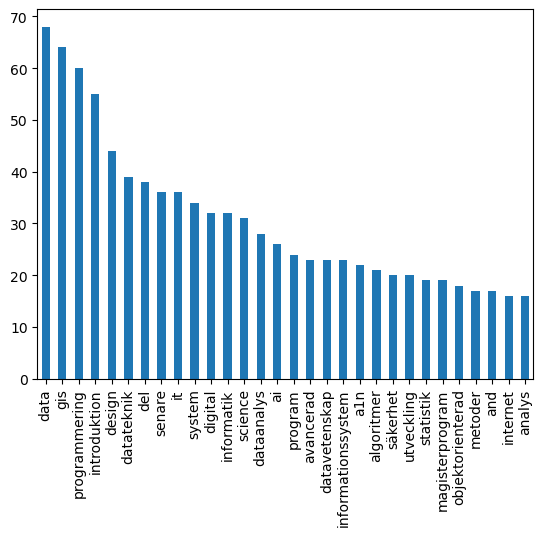

In [63]:
top_words = plot_top_words(antagning_df['anmälningsalternativ'], 50, 30)
top_words

In [50]:
# Visualize the number of the most frequent words
def plot_top_words(df, num_word_instances, top_word):
    tdm_df = create_term_document_matrix(df, min_df=2)
    word_frequencies = tdm_df[[x for x in tdm_df.columns if len(x) > 1]].sum()
    sorted_words = word_frequencies.sort_values(ascending=False)
    top_sorted_words = sorted_words[:num_word_instances]
    # Visualize the occurrences in a bar chart to the index of top_word
    top_sorted_words[:top_word].plot.bar()
    return top_sorted_words

# Analysis

In [ ]:
#Show trends in topics through wordcloud


# Research on OpenAlex

In [20]:
open_alex_url = "https://api.openalex.org/topics"

In [21]:
open_alex_response = requests.get(open_alex_url)
print(open_alex_response.status_code) # status code 200 is ok

200


In [22]:
open_alex_data = open_alex_response.json()
open_alex_data.keys()

dict_keys(['meta', 'results', 'group_by'])

In [23]:
# the data is what will be analysed and is therefore extracted from the embedded json-structure
open_alex_data = pd.DataFrame(open_alex_data['results'])
open_alex_data.head(10)

,id,display_name,description,keywords,ids,subfield,field,domain,siblings,works_count,cited_by_count,updated_date,created_date
0,https://openalex.org/T11475,Territorial Governance and Environmental Parti...,This cluster of papers explores the intersecti...,"[Territorial Governance, Environmental Partici...","{'openalex': 'https://openalex.org/T11475', 'w...","{'id': 'https://openalex.org/subfields/3312', ...","{'id': 'https://openalex.org/fields/33', 'disp...","{'id': 'https://openalex.org/domains/2', 'disp...","[{'id': 'https://openalex.org/T12194', 'displa...",616019,481253,2024-05-20T05:20:54.749492,2024-01-23
1,https://openalex.org/T13445,American Political Thought and History,This cluster of papers explores the developmen...,"[American founding, Constitutional government,...","{'openalex': 'https://openalex.org/T13445', 'w...","{'id': 'https://openalex.org/subfields/3320', ...","{'id': 'https://openalex.org/fields/33', 'disp...","{'id': 'https://openalex.org/domains/2', 'disp...","[{'id': 'https://openalex.org/T13494', 'displa...",445386,1299810,2024-05-20T05:07:23.578616,2024-01-23
2,https://openalex.org/T10165,Society and Economy in Ancient Mediterranean C...,This cluster of papers explores various aspect...,"[Ancient Rome, Greek Literature, Economic Hist...","{'openalex': 'https://openalex.org/T10165', 'w...","{'id': 'https://openalex.org/subfields/3314', ...","{'id': 'https://openalex.org/fields/33', 'disp...","{'id': 'https://openalex.org/domains/2', 'disp...","[{'id': 'https://openalex.org/T13669', 'displa...",390861,1181256,2024-05-20T05:21:05.782931,2024-01-23
3,https://openalex.org/T10362,Biblical Studies and Christian Theology,This cluster of papers focuses on biblical stu...,"[Biblical Monotheism, Jewish Society, Christia...","{'openalex': 'https://openalex.org/T10362', 'w...","{'id': 'https://openalex.org/subfields/1212', ...","{'id': 'https://openalex.org/fields/12', 'disp...","{'id': 'https://openalex.org/domains/2', 'disp...","[{'id': 'https://openalex.org/T14132', 'displa...",327847,741353,2024-05-20T05:17:00.233476,2024-01-23
4,https://openalex.org/T13641,History of Science and Technology,This cluster of papers covers a wide range of ...,"[Scientific History, Technological Development...","{'openalex': 'https://openalex.org/T13641', 'w...","{'id': 'https://openalex.org/subfields/1207', ...","{'id': 'https://openalex.org/fields/12', 'disp...","{'id': 'https://openalex.org/domains/2', 'disp...","[{'id': 'https://openalex.org/T12471', 'displa...",323622,240530,2024-05-20T05:16:36.734687,2024-01-23
5,https://openalex.org/T13624,Social Work in Spanish-Speaking Countries,This cluster of papers covers a wide range of ...,"[Social Work, Welfare State, Community Interve...","{'openalex': 'https://openalex.org/T13624', 'w...","{'id': 'https://openalex.org/subfields/3300', ...","{'id': 'https://openalex.org/fields/33', 'disp...","{'id': 'https://openalex.org/domains/2', 'disp...","[{'id': 'https://openalex.org/T13910', 'displa...",316639,183398,2024-05-20T05:06:35.794320,2024-01-23
6,https://openalex.org/T11893,Literary Studies and Criticism,This cluster of papers encompasses a wide rang...,"[Autorschaft, Bildung, Literaturkritik, Gender...","{'openalex': 'https://openalex.org/T11893', 'w...","{'id': 'https://openalex.org/subfields/1208', ...","{'id': 'https://openalex.org/fields/12', 'disp...","{'id': 'https://openalex.org/domains/2', 'disp...","[{'id': 'https://openalex.org/T12912', 'displa...",313964,129094,2024-05-20T05:20:11.769396,2024-01-23
7,https://openalex.org/T12983,Geometric Processing of Remote Sensing Imagery,This cluster of papers focuses on the geometri...,"[Remote Sensing, Geometric Processing, Satelli...","{'openalex': 'https://openalex.org/T12983', 'w...","{'id': 'https://openalex.org/subfields/2212', ...","{'id': 'https://openalex.org/fields/22', 'disp...","{'id': 'https://openalex.org/domains/3', 'disp...","[{'id': 'https://openalex.org/T11801', 'displa...",313588,97069,2024-05-20T05:05:28.581353

In [19]:
open_alex_data.info() # no attributes seem to miss values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              25 non-null     object
 1   display_name    25 non-null     object
 2   description     25 non-null     object
 3   keywords        25 non-null     object
 4   ids             25 non-null     object
 5   subfield        25 non-null     object
 6   field           25 non-null     object
 7   domain          25 non-null     object
 8   siblings        25 non-null     object
 9   works_count     25 non-null     int64 
 10  cited_by_count  25 non-null     int64 
 11  updated_date    25 non-null     object
 12  created_date    25 non-null     object
dtypes: int64(2), object(11)
memory usage: 2.7+ KB


In [ ]:
open_alex_data[].head

# Occupational forecast

In [25]:
job_data = fetch_data('https://data.jobtechdev.se/prognoser/yrkesbarometer.json')

200


In [26]:
# the data is what will be analysed and is therefore extracted from the embedded json-structure
job_df = pd.DataFrame.from_records(job_data)
job_df.head(10)

,yrkesomrade,yb_yrke,yb_concept_id,lan,antal_ssyk,del_av_ssyk,ssyk,ssyk_text,yb_beskrivning,jobbmojligheter,rekryteringssituation,prognos,text_jobbmojligheter,text_rekryteringssituation,hogsta_bedomningsniva,delvis_helt,omgang
0,Hälso- och sjukvård,AT-läkare,ADSv_niK_WH5,00,1,0,2213,AT-läkare,None,None,None,None,På grund av begränsat underlag görs ingen bedö...,På grund av begränsat underlag görs ingen bedö...,None,None,2024-1
1,Hälso- och sjukvård,AT-läkare,ADSv_niK_WH5,01,1,0,2213,AT-läkare,None,None,None,None,På grund av begränsat underlag görs ingen bedö...,På grund av begränsat underlag görs ingen bedö...,None,None,2024-1
2,Hälso- och sjukvård,AT-läkare,ADSv_niK_WH5,03,1,0,2213,AT-läkare,None,None,None,None,På grund av begränsat underlag görs ingen bedö...,På grund av begränsat underlag görs ingen bedö...,None,None,2024-1
3,Hälso- och sjukvård,AT-läkare,ADSv_niK_WH5,04,1,0,2213,AT-läkare,None,None,None,None,På grund av begränsat underlag görs ingen bedö...,På grund av begränsat underlag görs ingen bedö...,None,None,2024-1
4,Hälso- och sjukvård,AT-läkare,ADSv_niK_WH5,05,1,0,2213,AT-läkare,None,None,None,None,På grund av begränsat underlag görs ingen bedö...,På grund av begränsat underlag görs ingen bedö...,None,None,2024-1
5,Hälso- och sjukvård,AT-läkare,ADSv_niK_WH5,06,1,0,2213,AT-läkare,None,None,None,None,På grund av begränsat underlag görs ingen bedö...,På grund av begränsat underlag görs ingen bedö...,None,None,2024-1
6,Hälso- och sjukvård,AT-läkare,ADSv_niK_WH5,07,1,0,2213,AT-läkare,None,None,None,None,På grund av begränsat underlag görs ingen bedö...,På grund av begränsat underlag görs ingen bedö...,None,None,2024-1
7,Hälso- och sjukvård,AT-läkare,ADSv_niK_WH5,08,1,0,2213,AT-läkare,None,None,None,None,På grund av begränsat underlag görs ingen bedö...,På grund av begränsat underlag görs ingen bedö...,None,None,2024-1
8,Hälso- och sjukvård,AT-läkare,ADSv_niK_WH5,09,1,0,2213,AT-läkare,None,None,None,None,På grund av begränsat underlag görs ingen bedö...,På grund av begränsat underlag görs ingen bedö...,None,None,2024-1
9,Hälso- och sjukvård,AT-läkare,ADSv_niK_WH5,10,1,0,2213,AT-läkare,None,None,None,None,På grund av begränsat underlag görs ingen bedö...,På grund av begränsat underlag görs ingen bedö...,None,None,2024-1
